In [2]:
import numpy as np
import pandas as pd
from sys import argv
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt


MY_FEATURES = ["Herbology", "Ancient Runes", "Astronomy", "Charms", "Defense Against the Dark Arts"]

class LogReg:

    def __init__(self, filename):

        self.costs = None
        self.mean = None
        self.std = None
        self.df = pd.read_csv(filename)
        self.df = self.df.dropna()
        self.Y = self.df['Hogwarts House']
        self.house_names = self.Y.unique()
        print(self.house_names)
        self.df = self.df[MY_FEATURES]
        self.df = self.normalize_data(self.df)

        self.df = self.df.to_numpy(dtype=np.float128)

        self.convert_housenames()

        #flattern
        self.df = self.df.reshape(self.df.shape[0], -1).T
        self.Y = self.Y.reshape(self.Y.shape[0], -1).T

        self.thetas = []
        self.bs = []


    def convert_housenames(self):
        self.Y = np.asarray([np.float128(np.where(self.house_names == x)[0][0] + 1) for x in self.Y]).reshape(-1, 1)
        # self.Y = np.array(self.Y)


        self.Y_1 = (self.Y.astype(int) == 1).astype(int).reshape(-1,1)
        self.Y_2 = (self.Y.astype(int) == 2).astype(int).reshape(-1,1)
        self.Y_3 = (self.Y.astype(int) == 3).astype(int).reshape(-1,1)
        self.Y_4 = (self.Y.astype(int) == 4).astype(int).reshape(-1,1)

        self.y_s = [self.Y_1, self.Y_2, self.Y_3, self.Y_4]

    def normalize_data(self, data):
        self.mean = data.mean()
        self.std = data.std()
        return (data - data.mean()) / data.std()

    def init_with_zeroes(self, dim):
        self.theta = np.zeros(shape=(dim, 1))
        self.b = 0
        return self.theta, self.b

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def propagate(self, theta, b, X, Y):
        m = X.shape[1]
        g = (np.dot(theta.T,X) + b).T
        h = self.sigmoid(g)
        cost = (1/m) * np.sum(np.dot(-Y.T , np.log(h)) - 
        np.dot((1 - Y).T , np.log(1 - h)))
        #print(X.shape)
        dtheta = (1 / m) * np.dot(X, (h - Y))
        db = (1 / m) * np.sum(h - Y)

        cost = np.squeeze(cost)
        grads = {"dtheta": dtheta,
                 "db": db}
        return grads, cost

    def optimize(self, theta, b, X, Y, num_iterations, lr):
        costs = []
        for i in range(num_iterations):
            #print(i, num_iterations)
            grads, cost = self.propagate(theta, b, X, Y)

            dtheta = grads["dtheta"]
            db = grads["db"]

            theta = theta - lr * dtheta
            b = b - lr * db

            if i % 100 == 0:
                costs.append(cost)
        params = {"theta": theta,
                  "b": b}
        grads = {"dtheta": dtheta,
                 "db": db}
        return params, grads, cost

    def save_coefficients(self, filename='coefficients.json', folder='data'):
        results = []
        for theta, b in zip(self.thetas, self.bs):
          results.append({'b': str(b), 'theta': [str(th[0]) for th in theta.tolist()]})
        '''
        заменить путь внутри with
        '''
        print(results)
        with open('/coefficients.json', 'w') as file:
            file.write(json.dumps(results))

    def model(self, X, Y, lr=0.001, num_iterations=10000, visu=0):
        theta, b = self.init_with_zeroes(X.shape[0])
        parametrs = []
        grads = []
        costs = []
        for i,y in enumerate(self.y_s):
          parameter, grad, cost = self.optimize(theta, b, X, y, num_iterations, lr)
          parametrs.append(parameter)
          grads.append(grad)
          costs.append(cost)
          self.thetas.append(parameter['theta'])
          self.bs.append(parameter['b'])
        print('ok')
        self.save_coefficients(i)
        print('ok')
        self.costs = costs
        self.show_costs()
      
    def show_costs(self):
        plt.plot([i for i in range(len(self.costs))], self.costs)

    def predict(self):
        data = pd.read_csv('')
        print('STUB')




['Ravenclaw' 'Slytherin' 'Gryffindor' 'Hufflepuff']
ok
[{'b': '-0.9841017896779116684', 'theta': ['0.5687174064662564308', '0.8737137840054367176', '-0.5659964408265286446', '1.0382803378326241797', '0.56599644082652876065']}, {'b': '-1.4319684615384487333', 'theta': ['-0.71111441365792442984', '-0.7957454315792543557', '-0.6820249685117044245', '-0.52016492684131655837', '0.6820249685117045988']}, {'b': '-1.3163594320485527333', 'theta': ['-0.7683467681118024135', '1.0781718818746033778', '0.47826224842498010021', '-0.5615235617245853354', '-0.47826224842497996518']}, {'b': '-0.7622568423726405004', 'theta': ['0.9981232633069618428', '-1.1795310484340350117', '0.75000531606809725776', '0.10291370431209336251', '-0.7500053160680971558']}]
ok


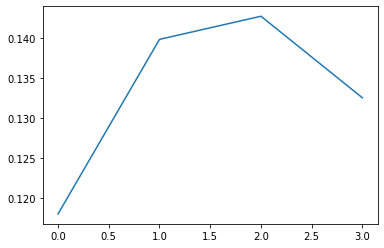

In [3]:
log_reg = LogReg('/content/dataset_train.csv')
log_reg.model(log_reg.df, log_reg.Y)


In [4]:
import os
import json


def error(msg):
  print(msg)
  exit()

coefficients_filename = '/coefficients.json'
def get_coefficients():
    full_filename = os.path.join(coefficients_filename)
    if os.path.exists(full_filename) and os.path.isfile(full_filename):
        with open(full_filename, 'r') as file:
            file = file.read()
        try:
            data = json.loads(file)
            return data
        except:
            error(f'format of the file "{full_filename}" is incorrect (this must be json contains dict with 2 keys: "teta_0" and "teta_1", all them is floats or ints)')
    error(f'the ("{full_filename}") file with coefficients is not exists')

In [ ]:
print(get_coefficients())

[{'b': '-0.9841017896779116684', 'theta': ['0.5687174064662564308', '0.8737137840054367176', '-0.5659964408265286446', '1.0382803378326241797', '0.56599644082652876065']}, {'b': '-1.4319684615384487333', 'theta': ['-0.71111441365792442984', '-0.7957454315792543557', '-0.6820249685117044245', '-0.52016492684131655837', '0.6820249685117045988']}, {'b': '-1.3163594320485527333', 'theta': ['-0.7683467681118024135', '1.0781718818746033778', '0.47826224842498010021', '-0.5615235617245853354', '-0.47826224842497996518']}, {'b': '-0.7622568423726405004', 'theta': ['0.9981232633069618428', '-1.1795310484340350117', '0.75000531606809725776', '0.10291370431209336251', '-0.7500053160680971558']}]


In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

MY_FEATURES = ["Herbology", "Ancient Runes", "Astronomy", "Charms", "Defense Against the Dark Arts"]
ALL_NEEDED = ["Herbology", "Ancient Runes", "Astronomy", "Charms", "Defense Against the Dark Arts", 'Hogwarts House']
data = pd.read_csv('/content/dataset_train.csv')
data = data[ALL_NEEDED]
data_X = data[MY_FEATURES].dropna()
data_X = (data_X - data_X.mean()) / data_X.std()


house_names = data['Hogwarts House'].unique()
Y = data['Hogwarts House']
y_true = np.asarray([np.float128(np.where(house_names == x)[0][0] + 1) for x in Y])

def sigmoid(X):
  return 1 / (1 + np.exp(-X))

def get_housenames(coeff_dict, X):
  coeff_dict['theta'] = np.array(coeff_dict['theta'], dtype=float)
  coeff_dict['b'] = np.float(coeff_dict['b'])
  return sigmoid(coeff_dict['b'] + np.dot(coeff_dict['theta'], X))

def predict():
  coeffs = get_coefficients()
  our_label = []
  for index, row in data.iterrows():
    X = row[MY_FEATURES].to_numpy(dtype=float)
    values = []
    for i in range(len(coeffs)):
      values.append(get_housenames(coeffs[i], X))
    my_values = np.argmax(values) + 1
    our_label.append(my_values)

  return our_label

y_pred = np.array(predict(), dtype=float)
print(len(y_pred))
print(accuracy_score(y_true, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


1600
0.42
